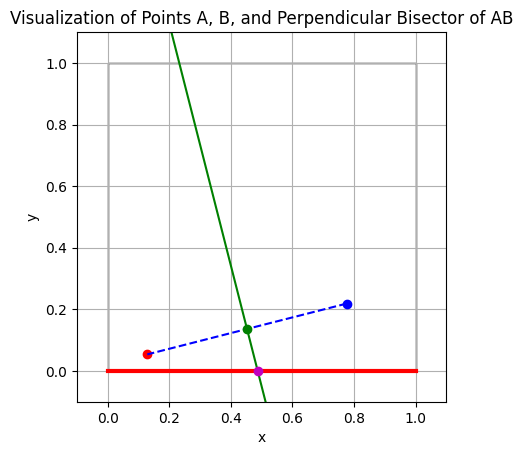

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points A and B
A = np.random.rand(2)
B = np.random.rand(2)

# Determine the nearest side to B
distances = {
    "left": B[0],
    "right": 1 - B[0],
    "bottom": B[1],
    "top": 1 - B[1]
}
nearest_side = min(distances, key=distances.get)

# Calculate the midpoint of AB
midpoint = (A + B) / 2

# Calculate slope of AB and perpendicular slope
if B[0] != A[0]:
    slope_AB = (B[1] - A[1]) / (B[0] - A[0])
    perpendicular_slope = -1 / slope_AB
else:
    perpendicular_slope = 0  # AB is vertical, perpendicular bisector is horizontal

# Calculate y-intercept of perpendicular bisector
c = midpoint[1] - perpendicular_slope * midpoint[0]

# Determine intersection with the nearest side
if nearest_side == "left":
    x_intersect, y_intersect = 0, c
elif nearest_side == "right":
    x_intersect, y_intersect = 1, perpendicular_slope + c
elif nearest_side == "bottom":
    y_intersect, x_intersect = 0, (0 - c) / perpendicular_slope if perpendicular_slope != 0 else midpoint[0]
elif nearest_side == "top":
    y_intersect, x_intersect = 1, (1 - c) / perpendicular_slope if perpendicular_slope != 0 else midpoint[0]

# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

# Plot the unit square boundary
square = plt.Rectangle((0, 0), 1, 1, edgecolor="black", facecolor="none", linewidth=1)
ax.add_patch(square)

# Highlight the nearest side to B
if nearest_side == "left":
    ax.plot([0, 0], [0, 1], 'r-', linewidth=3, label='Nearest Side to B')
elif nearest_side == "right":
    ax.plot([1, 1], [0, 1], 'r-', linewidth=3, label='Nearest Side to B')
elif nearest_side == "bottom":
    ax.plot([0, 1], [0, 0], 'r-', linewidth=3, label='Nearest Side to B')
elif nearest_side == "top":
    ax.plot([0, 1], [1, 1], 'r-', linewidth=3, label='Nearest Side to B')

# Plot points A and B
ax.plot(A[0], A[1], 'bo', label='Point A')
ax.plot(B[0], B[1], 'ro', label='Point B')

# Plot line segment AB
ax.plot([A[0], B[0]], [A[1], B[1]], 'b--', label='Line Segment AB')

# Plot midpoint of AB
ax.plot(midpoint[0], midpoint[1], 'go', label='Midpoint')

# Plot the perpendicular bisector
x_vals = np.array([-0.1, 1.1])  # Extend line to plot edges
y_vals = perpendicular_slope * x_vals + c
ax.plot(x_vals, y_vals, 'g-', label='Perpendicular Bisector')

# Plot the intersection point if within bounds
if (nearest_side in ["left", "right"] and 0 <= y_intersect <= 1) or \
   (nearest_side in ["top", "bottom"] and 0 <= x_intersect <= 1):
    ax.plot(x_intersect, y_intersect, 'mo', label='Intersection Point')

# Add legend and labels
ax.set_title("Visualization of Points A, B, and Perpendicular Bisector of AB")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [3]:
# Run a large simulation to estimate the probability that the intersection of the perpendicular bisector of AB 
# lies on the nearest side to point B.

# Updated simulation parameters
num_simulations = 1_000_000  # 1 million simulations for higher accuracy
count1 = 0
count2 = 0

# Run simulation
for _ in range(num_simulations):
    # Generate random points A and B
    A = np.random.rand(2)
    B = np.random.rand(2)
    
    # Identify the nearest side to point B
    distances = {
        "left": B[0],
        "right": 1 - B[0],
        "bottom": B[1],
        "top": 1 - B[1]
    }
    nearest_side = min(distances, key=distances.get)
    
    # Calculate the midpoint of AB
    midpoint = (A + B) / 2

    # Calculate the slope of AB and the perpendicular slope
    if B[0] != A[0]:
        slope_AB = (B[1] - A[1]) / (B[0] - A[0])
        perpendicular_slope = -1 / slope_AB
    else:
        perpendicular_slope = 0  # AB is vertical, perpendicular bisector is horizontal

    # Calculate y-intercept of perpendicular bisector
    c = midpoint[1] - perpendicular_slope * midpoint[0]

    # Determine intersection point with the nearest side
    if nearest_side == "left":
        x_intersect, y_intersect = 0, c
    elif nearest_side == "right":
        x_intersect, y_intersect = 1, perpendicular_slope + c
    elif nearest_side == "bottom":
        y_intersect, x_intersect = 0, (0 - c) / perpendicular_slope if perpendicular_slope != 0 else midpoint[0]
    elif nearest_side == "top":
        y_intersect, x_intersect = 1, (1 - c) / perpendicular_slope if perpendicular_slope != 0 else midpoint[0]

    # Check if the intersection resides within the nearest side boundary
    if (nearest_side in ["left", "right"] and 0 <= y_intersect <= 1) or \
       (nearest_side in ["top", "bottom"] and 0 <= x_intersect <= 1):
        count1 += 1  # Intersection is within the side
    else:
        count2 += 1  # Intersection is outside the side or cannot be found

# Calculate the probability
probability = count1 / (count1 + count2)
probability

0.490834